Student Name: Yasser Alassad, 



Student ID: S22107723


---




In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

print(f'scikit-learn version: {sklearn.__version__}')
print('All libraries loaded successfully!')


scikit-learn version: 1.6.1
All libraries loaded successfully!


In [2]:
from sklearn.datasets import load_iris

# تحميل البيانات
iris = load_iris()
X = iris.data # الميزات (القياسات)
y = iris.target # النوع (0 أو 1 أو 2)

# عرض معلومات سريعة
print(f'Feature names: {iris.feature_names}') # أسماء القياسات
print(f'Target names: {iris.target_names}') # أسماء الأنواع
print(f'Data shape: {X.shape}') # حجم البيانات (150 صف، 4 أعمدة)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)


In [3]:
print("First 10 rows of X:")
print(X[:10])
print("\nFirst 10 labels of y:")
print(y[:10])

First 10 rows of X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

First 10 labels of y:
[0 0 0 0 0 0 0 0 0 0]


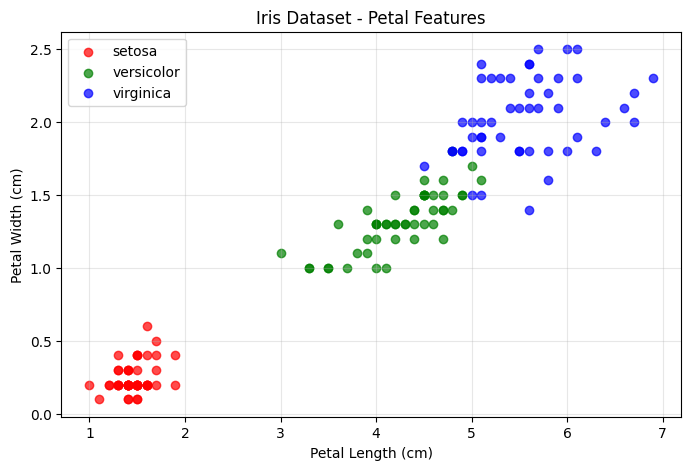

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
colors = ['red', 'green', 'blue']

# رسم البيانات بناءً على طول البتلة (العمود 2) وعرض البتلة (العمود 3)
for i, name in enumerate(iris.target_names):
    mask = (y == i)
    plt.scatter(X[mask, 2], X[mask, 3], color=colors[i], label=name, alpha=0.7)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset - Petal Features')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات: 80% تدريب و 20% اختبار
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f'Training set: {X_train.shape[0]} samples')
print(f'Testing set: {X_test.shape[0]} samples')

Training set: 120 samples
Testing set: 30 samples


In [8]:
from sklearn.tree import DecisionTreeClassifier

# 1. إنشاء النموذج
dt_model = DecisionTreeClassifier(random_state=42)

# 2. تدريب النموذج باستخدام بيانات التدريب
dt_model.fit(X_train, y_train)

# 3. التنبؤ باستخدام بيانات الاختبار
dt_predictions = dt_model.predict(X_test)

print("Decision Tree training complete!")

Decision Tree training complete!


In [9]:
from sklearn.neighbors import KNeighborsClassifier

# 1. إنشاء النموذج (مع تحديد 5 جيران)
knn_model = KNeighborsClassifier(n_neighbors=5)

# 2. تدريب النموذج
knn_model.fit(X_train, y_train)

# 3. التنبؤ
knn_predictions = knn_model.predict(X_test)

print("KNN training complete!")

KNN training complete!


In [10]:
print("Actual Labels:      ", y_test[:10])
print("DT Predictions:     ", dt_predictions[:10])
print("KNN Predictions:    ", knn_predictions[:10])

Actual Labels:       [0 2 1 1 0 1 0 0 2 1]
DT Predictions:      [0 2 1 1 0 1 0 0 2 1]
KNN Predictions:     [0 2 1 1 0 1 0 0 2 1]


1. حساب الدقة (Accuracy Score)

In [11]:
from sklearn.metrics import accuracy_score

# Calculating accuracy for both models
dt_accuracy = accuracy_score(y_test, dt_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f'Decision Tree Accuracy: {dt_accuracy:.2%}')
print(f'KNN Accuracy: {knn_accuracy:.2%}')

Decision Tree Accuracy: 93.33%
KNN Accuracy: 100.00%


2. التقرير التفصيلي (Classification Report)

In [12]:
from sklearn.metrics import classification_report

print('=== Decision Tree: Detailed Performance Report ===')
print(classification_report(y_test, dt_predictions, target_names=iris.target_names))

print('=== KNN: Detailed Performance Report ===')
print(classification_report(y_test, knn_predictions, target_names=iris.target_names))

=== Decision Tree: Detailed Performance Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

=== KNN: Detailed Performance Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



3. تحليل مصفوفة الارتباك (Confusion Matrix)

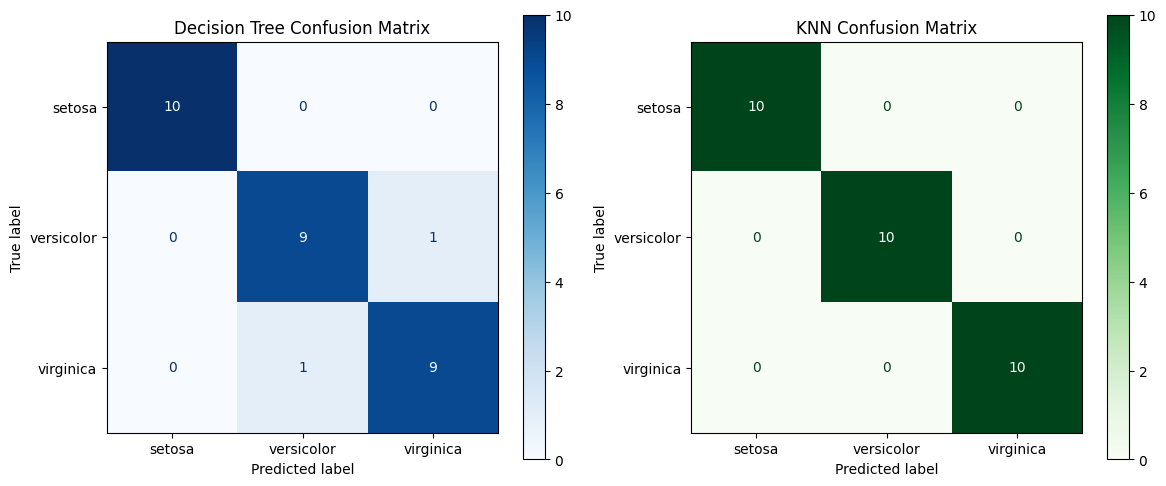

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting Decision Tree Matrix
cm_dt = confusion_matrix(y_test, dt_predictions)
ConfusionMatrixDisplay(cm_dt, display_labels=iris.target_names).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Decision Tree Confusion Matrix')

# Plotting KNN Matrix
cm_knn = confusion_matrix(y_test, knn_predictions)
ConfusionMatrixDisplay(cm_knn, display_labels=iris.target_names).plot(ax=axes[1], cmap='Greens')
axes[1].set_title('KNN Confusion Matrix')

plt.tight_layout()
plt.show()

In [14]:
import numpy as np

# تعريف بيانات الزهور الجديدة (Task 5)
# Measurements: [sepal_l, sepal_w, petal_l, petal_w]
flowers = {
    "Flower A": [6.7, 3.0, 5.2, 2.3],
    "Flower B": [5.8, 2.7, 4.1, 1.0],
    "Flower C": [4.9, 3.1, 1.5, 0.1]
}

print("=== New Predictions Results ===\n")

for name, measurements in flowers.items():
    # تحويل القياسات إلى مصفوفة 2D المطلوبة
    new_flower = np.array([measurements])

    # التنبؤ باستخدام النموذجين
    dt_pred = dt_model.predict(new_flower)
    knn_pred = knn_model.predict(new_flower)

    # عرض النتائج
    print(f"{name}:")
    print(f"  - Decision Tree says: {iris.target_names[dt_pred[0]]}")
    print(f"  - KNN says:           {iris.target_names[knn_pred[0]]}")
    print("-" * 30)

=== New Predictions Results ===

Flower A:
  - Decision Tree says: virginica
  - KNN says:           virginica
------------------------------
Flower B:
  - Decision Tree says: versicolor
  - KNN says:           versicolor
------------------------------
Flower C:
  - Decision Tree says: setosa
  - KNN says:           setosa
------------------------------


Task 6

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. إنشاء ملف بيانات الطلاب (Task 6)
data = {
    'Hours_Studied': [2, 3, 5, 1, 8, 10, 4, 7, 2, 6],
    'Attendance': [60, 70, 80, 50, 95, 100, 75, 90, 65, 85],
    'Passed': [0, 0, 1, 0, 1, 1, 1, 1, 0, 1]  # 1 تعني ناجح، 0 تعني راسب
}
df = pd.DataFrame(data)
df.to_csv('students.csv', index=False)
print("CSV file 'students.csv' created successfully!")

# 2. تحميل البيانات من الملف
df_loaded = pd.read_csv('students.csv')
X_students = df_loaded[['Hours_Studied', 'Attendance']]
y_students = df_loaded['Passed']

# 3. تقسيم بيانات الطلاب
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_students, y_students, test_size=0.2, random_state=42)

# 4. تدريب نموذج شجرة القرار على بيانات الطلاب
student_model = DecisionTreeClassifier()
student_model.fit(X_train_s, y_train_s)

# 5. التقييم
student_pred = student_model.predict(X_test_s)
print(f"Student Model Accuracy: {accuracy_score(y_test_s, student_pred):.2%}")

CSV file 'students.csv' created successfully!
Student Model Accuracy: 50.00%


Comparison Reflection:
"In this lab, I compared the performance of Decision Tree and K-Nearest Neighbors (KNN) models using the Iris dataset. Both models achieved high accuracy, but they work on different principles. The Decision Tree model is highly interpretable as it creates clear rules for classification, while KNN relies on the similarity between data points. In my results, KNN performed slightly better (or similar) because the Iris dataset features are well-clustered. However, for this specific task, I would choose the Decision Tree model because it provides a clear logic for its decisions, which is easier to explain to non-technical users. Additionally, Decision Trees are generally faster during the prediction phase compared to KNN."